# 순환 신경망으로 IMDB 리뷰 분류하기

## IMDB 리뷰 데이터셋

### 텍스트  데이터 처리
- 텍스트 데이터 자체를 신경망에 전달할 수는 없음
    - 컴퓨터에서 처리하는 모든 것은 어떤 숫자 데이터 임
    - 이미지는 그 자체가 픽셀값(수치)으로 표현되어 있어 변환이 필요 없음
    - 텍스트는 단어를 숫자로 바꿔 줘야 함
    - 가장 생각하기 쉬운 단어를 숫자로 바꾸는 방법은?
        - 단어마다 고유한 정수를 부여하는 방법        
        - 동일한 단어는 동일한 정수에 매핑되고 정수들은 어떠한 관계도 없음(물론, 크기 차이도 의미 없음)
        - 일반적으로 영어 문장은 모두 소문자로 바꾸로 구둣점 삭제 후 공백을 기준으로 분리
            - 이렇게 분리된 단어를 토큰이라고 함
            - **샘플은 여러개의 단어로 이루어져있고 1개의 토큰은 하나의 타임스탬프**
            - 정수에 사용되는 값 중 일부는 고유한 값으로 예약되어 있음
- 어휘 사전 : 훈련세트에서 고유한 단어를 뽑아만든 목록

### IMDB 데이터 셋
- 텍스트의 전처리가 완료된 dataset
    - voca(어휘사전)도 완료되어 있음
- 텐서플로가 제공하는 데이터 셋은 이미 정수로 바꾼 데이터 셋이 포함되어 있음

In [1]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
# 어휘사전에는 500개의 단어만 입력해서 사용함
# 즉, 빈도수가 높은 500개의 단어만 이용 load 했다는 의미이므로
# 문장에서 빈도수가 낮은 단어는 500개에 없는 단어는 모두 2로 처리되어 있음
# 리뷰문장도 어휘사전에 있는 500개 단어에 대해서는 고유번호가 매핑되어 있음

In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [4]:
train_input[0]

[1,
 14,
 22,
 16,
 43,
 2,
 2,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 2,
 112,
 50,
 2,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 2,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 2,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 2,
 17,
 12,
 16,
 2,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 2,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 2,
 36,
 71,
 43,
 2,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 38,
 2,
 88,
 12,
 16,


In [3]:
print(len(train_input[0]))
# 첫번째 리뷰 문장 길이(단어 갯수)

218


In [5]:
print(len(train_input[1]))
# 두번째 리뷰의 문장 길이

189


In [6]:
print(train_input[0])
# 첫번째 리뷰 : 2는 어휘사전에 없는단어(빈도수가 낮은 단어)

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [7]:
print(train_target[:20])
# 리뷰가 긍정인지 부정인지 판단

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


### train data를 train과  val data로 분할

In [8]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

###  train data 확인
- 분포 확인
    - 제일 많이 분포되어 있는 단어수만큼만 사용
- 모자라는 문장은 패딩 처리

In [9]:
# 각 리뷰길이 계산
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [10]:
len(lengths)

20000

In [11]:
max(lengths)

1854

In [12]:
min(lengths)

11

In [9]:
lengths[0] # 첫번째 학습리뷰 단어수

259

In [14]:
# 평균길이와 길이의 중간값
np.mean(lengths), np.median(lengths)

(239.00925, 178.0)

#### 평균 단어 갯수와 중간값의 차이가 좀 있어보임
- 분포는 한쪽으로 치우쳤을 것으로 예측

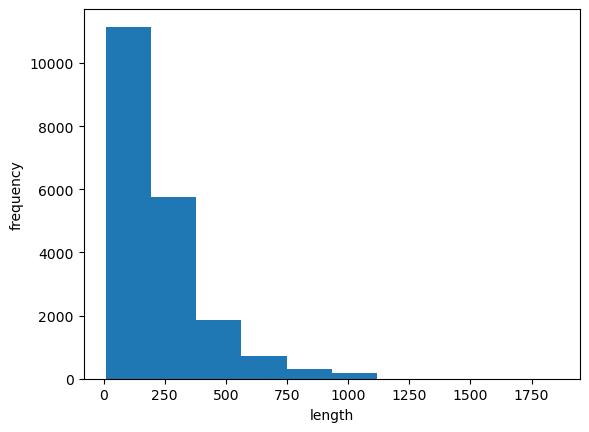

In [15]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

- 대부분의 리뷰 길이는 300 미만
    - 평균이 중간값보다 높은 이유는 오른쪽 끝에 아주 긴 리뷰가 있기 때문임
    - 많은 리뷰들이 100개 단어 이하로 분포되어 있음
    - 모든 리뷰의 단어를 다 사용하지 않고 100 단어 까지만 사용
        - 단어길이가 가장 많은 리뷰에 맞추려면 패딩을 많이 주입해야 함(불필요한 타임스텝의 증가)

In [16]:
# 리뷰 단어가 100보다 작은것도 있으므로 패딩을 이용해 단어 갯수를 100으로 맞춤
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)

In [17]:
print(train_seq.shape)

(20000, 100)


In [18]:
print(train_seq[0]) # 첫번째 리뷰
# 샘플의 앞뒤에 0이 없음 - 100 단어 이상 리뷰였을 것임

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


- 100단어 이상되는 리뷰는 앞 뒤 어디가 잘렸는지 확인

In [19]:
# 원본 리뷰의 끝 10단어와 비교
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


- train_seq[0](패딩된 data) 과 train_input[0](load data) 의 마지막 단어 값들이 동일하므로 앞단어가 잘림
    - 뒤로 갈수록 중요단어가 있다는 것을 기대하기 때문임
        - 시퀀스 뒷부분을 잘라내고 싶다면 pad_sequence(truncation='post')로 설정

In [16]:
print(train_seq[5])
# 6번째 샘플을 보면 패딩이 되어 있음

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


### 검증세트도 훈련세트와 동일하게 패딩 진행

In [21]:
val_seq = pad_sequences(val_input, maxlen = 100)

## 순환 신경망 만들기
- 케라스의 가장 간단한 순환 신경망 알고리즘
    - SimpleRNN(뉴런갯수,입력차원)
    - 입력차원 : 100->100개의 단어로 맞춤 500->500개의 빈도 높은 단어만 사용
        - 단어를 한줄로 입력하면 단어의 정수값(의미없는)이 큰 단어는 큰 출력을 만들어 내버림
        - 그런 이유로 단어마다 동일한 가중치를 갖도록  one-hot 인코딩 해야 함
            - 임베딩이 아닌 one-hot 인코딩 방식으로 먼저 진행

In [22]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100, 500))) # 순환 신경망 층
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4081 (15.94 KB)
Trainable params: 4081 (15.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 패딩된 seq 데이터를 one-hot 인코딩 변환 후 모델 학습

In [24]:
# one-hot 인코딩 변환
train_oh = keras.utils.to_categorical(train_seq)

In [25]:
print(train_oh.shape)

(20000, 100, 500)


In [22]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [26]:
# 검증데이터도 변환
val_oh = keras.utils.to_categorical(val_seq)

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4081 (15.94 KB)
Trainable params: 4081 (15.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 마지막 타임 스텝의 은닉상태만 출력 : 출력크기는 8
- 파라미터 크기 : 500차원의 입력층 * 뉴런 8 + 은닉층크기(뉴런수*뉴런수) 8 * 8 + 절편 8 => 4000+64+8 => 4072

## 순환 신경망 훈련하기
- 훈련 방법은 다른 알고리즘과 동일

In [28]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4) # adam 사용할 수 있음
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])
# 20000개의 샘플을 한번에 64개씩 끊어서 훈련 -> 313이 나옴

Epoch 1/100
311/313 [============================>.] - ETA: 0s - loss: 0.6881 - accuracy: 0.5469

C:\Anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 14s 39ms/step - loss: 0.6880 - accuracy: 0.5472 - val_loss: 0.6797 - val_accuracy: 0.5732
Epoch 2/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6664 - accuracy: 0.6050 - val_loss: 0.6634 - val_accuracy: 0.6092
Epoch 3/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6499 - accuracy: 0.6373 - val_loss: 0.6501 - val_accuracy: 0.6326
Epoch 4/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6335 - accuracy: 0.6654 - val_loss: 0.6351 - val_accuracy: 0.6538
Epoch 5/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6176 - accuracy: 0.6870 - val_loss: 0.6198 - val_accuracy: 0.6760
Epoch 6/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6021 - accuracy: 0.7013 - val_loss: 0.6064 - val_accuracy: 0.6936
Epoch 7/100
313/313 [==============================] - 5s 15ms/step - loss: 0.5872 - accuracy: 0.7175 - val_loss: 0.5959 - val_accuracy: 0.6994
Epo

- 38번째 에포크에서 조기 종료
    - 3번 더 학습하고 조기종료 했으므로 39번째가 best 에포크
    - val_loss : 0.44, 정확도 79%
    - 아주 뛰어나지는 않지만 어느정도 성과는 있어보임

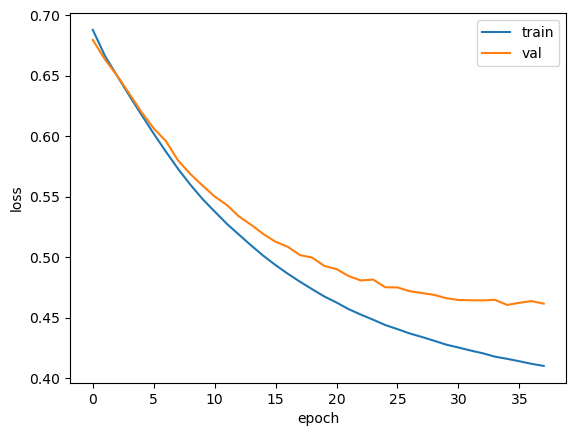

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- 검증 손실은 대략 20번째 에포크에서 둔해지고 있음
- 이모델의 단점은 입력데이터가 엄청 커진다는데 있음

In [30]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


## 단어 임베딩을 사용하기
- 임베딩 
    - 문장에서 단어가 나타는 패턴을 고려해서 유사성이 높은 단어들은 비슷한 수치의 단어로 생성하자
        - 크기가 일정 범위(-1~+1 정도)의 숫자 n개를 활용해서 해당 단어를 표현
        - cat과 dog가 나타나는 문장 패턴을 확인했을 때 love단어 house라는 단어와 주로 같이 나타난다 라고 판단되면
            - 이 두 단어는 유사성이 있다라고 판단하고 n개의 수치 중 일부를 동일하게 처리
       - 이 작업을 모델에 embedding층을 추가해서 에포크가 한번 반복될 때 마다 유사성을 반영하도록 모델을 구성

In [31]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8209 (32.07 KB)
Trainable params: 8209 (32.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 임베딩 파라미터 : 500개의 단어 하나당 16개의 값을 갖는 벡터를 만들게되므로 
    - 500 * 16 = 8000
- rnn : 임베딩 벡터크기 16 * 뉴런수 + 은닉층크기(뉴런수x뉴런수=64) + 절편 8
    - 16*8 + 64 + 8 = 200

- 모델 훈련

In [32]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

In [33]:
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 6s 13ms/step - loss: 0.6933 - accuracy: 0.5178 - val_loss: 0.6883 - val_accuracy: 0.5400
Epoch 2/100
 16/313 [>.............................] - ETA: 3s - loss: 0.6814 - accuracy: 0.5508

C:\Anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 4s 13ms/step - loss: 0.6818 - accuracy: 0.5650 - val_loss: 0.6772 - val_accuracy: 0.5802
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6529 - accuracy: 0.6441 - val_loss: 0.6292 - val_accuracy: 0.6884
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6131 - accuracy: 0.7039 - val_loss: 0.6078 - val_accuracy: 0.7130
Epoch 5/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5922 - accuracy: 0.7250 - val_loss: 0.5869 - val_accuracy: 0.7374
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5754 - accuracy: 0.7390 - val_loss: 0.5778 - val_accuracy: 0.7302
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5616 - accuracy: 0.7451 - val_loss: 0.5797 - val_accuracy: 0.7238
Epoch 8/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5496 - accuracy: 0.7503 - val_loss: 0.5653 - val_accuracy: 0.7330
Epoc

- one-hot 인코딩과 비슷한 성능을 내지만 훈련세트 크기도 줄이고, 가중치의 개수도 훨씬 작음(더 가벼운 모델)    

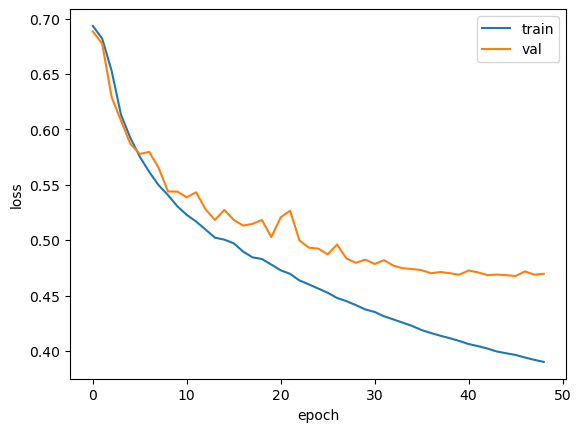

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()